Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Bruno C. Gonzalez"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Setup

In [2]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data
import datetime
import yfinance as yf
import pandas_datareader.data as web

np.random.seed(12345)
import matplotlib.pyplot as plt  # for visualizing our data

plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Downloading Stock Prices

In [3]:
%env QUANDL_API_KEY = ssupytRJKP5VYy9hia6S

import quandl
#quandl.ApiConfig.api_key = "YOUR_API_KEY"

env: QUANDL_API_KEY=ssupytRJKP5VYy9hia6S


In [4]:
# I use today date to download the prices.
# I also include here some parameters
companies = ['AMZN','FB', 'MMM', 'IBM']
#start = datetime.datetime.today() - datetime.timedelta(5*365)
#end = datetime.datetime.today()
start = datetime.datetime(2013, 11, 12)
end = datetime.datetime(2018, 11, 12)

In [5]:
# I put all the prices in a dictionary
prices = {}
for c in companies:
    print(c)
    p = web.DataReader(c, 'quandl', start, end)['AdjClose']
    print("Lenght: ", len(p), "start date: ", p.index.min(), "end date", p.index.max())
    prices[c] = p
    # Using yfinance
    #prices[c] = yf.download(c, start=start, end=end)#['Adj Close']

AMZN
Lenght:  1098 start date:  2013-11-12 00:00:00 end date 2018-03-27 00:00:00
FB
Lenght:  1099 start date:  2013-11-12 00:00:00 end date 2018-03-27 00:00:00
MMM
Lenght:  1018 start date:  2013-11-12 00:00:00 end date 2018-03-07 00:00:00
IBM
Lenght:  1099 start date:  2013-11-12 00:00:00 end date 2018-03-27 00:00:00


<AxesSubplot:xlabel='Date'>

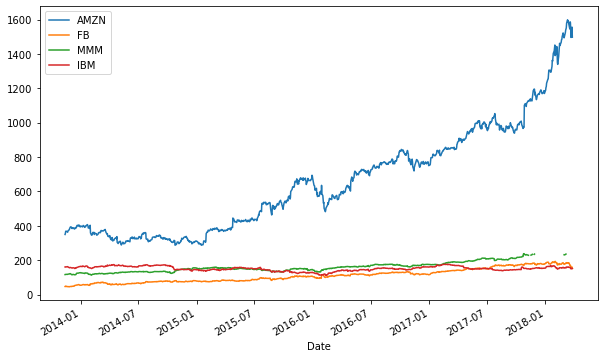

In [17]:
# Dataframe with all prices
pd.DataFrame(prices).plot()

## Resample Data

In [7]:
# Resamples are in a dictionary too.
resam_prices = {}

for c, p in prices.items():
    print(c)
    #resam_prices[p] = prices[p].asfreq("BM")
    resam_prices[c] = p.resample("BM").pad()

AMZN
FB
MMM
IBM


In [8]:
pd.DataFrame(resam_prices)

,AMZN,FB,MMM,IBM
Date,,,,
2013-11-29,393.620,47.010,121.460776,157.541673
2013-12-31,398.790,54.649,127.592494,164.459548
2014-01-31,358.690,62.570,116.620904,154.911302
2014-02-28,362.100,68.460,123.374090,163.238274
2014-03-31,336.365,60.240,124.225704,169.691286
...,...,...,...,...
2017-11-30,1176.750,177.180,235.630000,153.970000
2017-12-29,1169.470,176.460,238.260000,153.420000
2018-01-31,1451.650,186.890,238.260000,163.700000


## Autocorrelation Plot

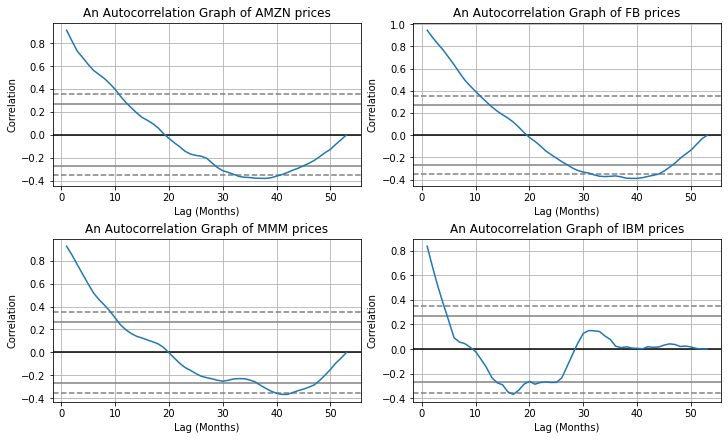

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
for (c, p), ax in zip(resam_prices.items(), axs.flatten()):
    pd.plotting.autocorrelation_plot(p, ax=ax)
    ax.set_title("An Autocorrelation Graph of {} prices".format(c))
    ax.set_ylabel("Correlation")
    ax.set_xlabel("Lag (Months)")

plt.show()

There's autocorrelation for the first months.

In general, for all the companies, the autocorrelation decrease over time. This means that each month that passes affects less to the current month. In some cases, the autocorrelation increase again, but in my opinion is not significant enough, and doesn't make any sense neither.

## Monthly returns

In [10]:
returns = {}

for c, p in resam_prices.items():
    print(c)
    returns[c] = p.divide(p.shift(1)).dropna()-1

AMZN
FB
MMM
IBM


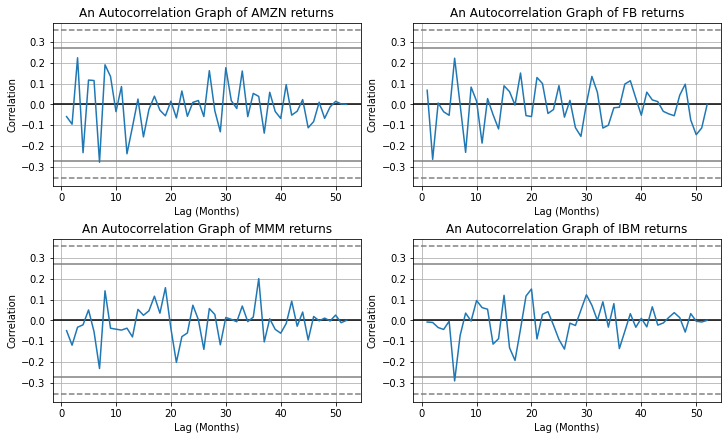

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
for (c, p), ax in zip(returns.items(), axs.flatten()):
    pd.plotting.autocorrelation_plot(p, ax=ax)
    ax.set_title("An Autocorrelation Graph of {} returns".format(c))
    ax.set_ylabel("Correlation")
    ax.set_xlabel("Lag (Months)")

plt.show()

For the monthly returns, there's not autocorrelation.

## Combined series

In [12]:
df_returns = pd.DataFrame(returns)
df_returns

,AMZN,FB,MMM,IBM
Date,,,,
2013-12-31,0.013134,0.162497,0.050483,0.043911
2014-01-31,-0.100554,0.144943,-0.085989,-0.058058
2014-02-28,0.009507,0.094135,0.057907,0.053753
2014-03-31,-0.071072,-0.120070,0.006903,0.039531
2014-04-30,-0.095833,-0.007636,0.025284,0.020676
...,...,...,...,...
2017-11-30,0.064662,-0.015995,0.023633,0.009390
2017-12-29,-0.006187,-0.004064,0.011162,-0.003572
2018-01-31,0.241289,0.059107,0.000000,0.067006


array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='FB', ylabel='AMZN'>,
        <AxesSubplot:xlabel='MMM', ylabel='AMZN'>,
        <AxesSubplot:xlabel='IBM', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='FB'>,
        <AxesSubplot:xlabel='FB', ylabel='FB'>,
        <AxesSubplot:xlabel='MMM', ylabel='FB'>,
        <AxesSubplot:xlabel='IBM', ylabel='FB'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='MMM'>,
        <AxesSubplot:xlabel='FB', ylabel='MMM'>,
        <AxesSubplot:xlabel='MMM', ylabel='MMM'>,
        <AxesSubplot:xlabel='IBM', ylabel='MMM'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='IBM'>,
        <AxesSubplot:xlabel='FB', ylabel='IBM'>,
        <AxesSubplot:xlabel='MMM', ylabel='IBM'>,
        <AxesSubplot:xlabel='IBM', ylabel='IBM'>]], dtype=object)

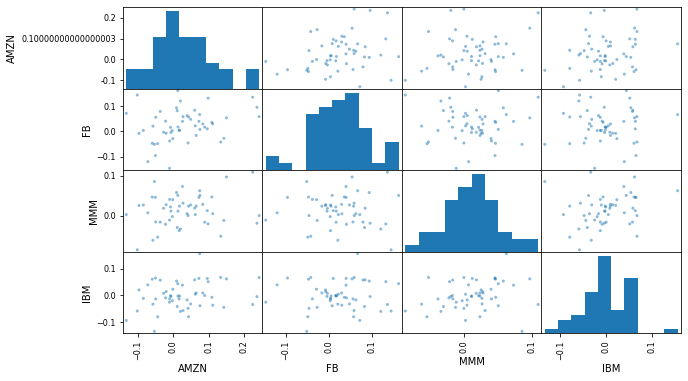

In [13]:
#fig, ax = plt.subplots()
pd.plotting.scatter_matrix(df_returns)

From the plot, it seems there's a little correlation between IBM-MMM, and AMZN-FB. If we get the actual correlation coefficients, we can see that the higher correlation is between Amazon and Facebook, which makes sense due both are in the technological sector.

In [16]:
df_returns.corr()

,AMZN,FB,MMM,IBM
AMZN,1.000000,0.277751,0.184382,0.244942
FB,0.277751,1.000000,-0.010490,0.037830
MMM,0.184382,-0.010490,1.000000,0.236173
IBM,0.244942,0.037830,0.236173,1.000000
